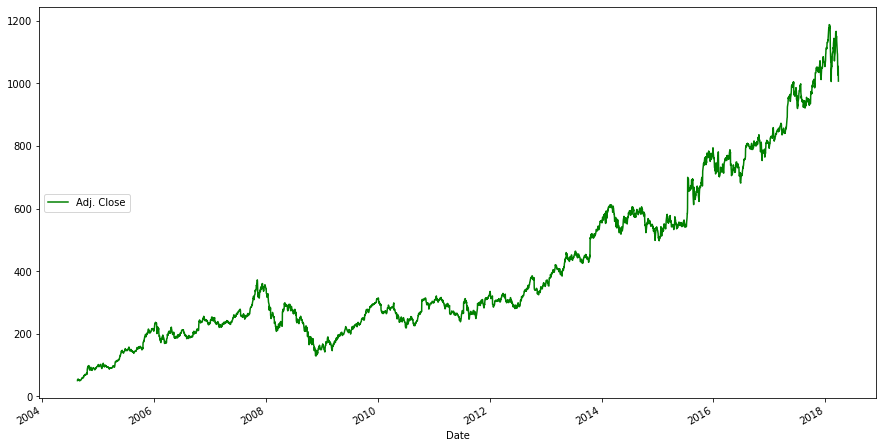

In [49]:
import quandl
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
#Linear Regression is BY NO MEANS accurate, but it's close! This is mostly to practice python and ML :)

quandl.ApiConfig.api_key = 'ftL7qUs3N_k1Tsseyn5A'

#Fetch info from quandl wiki page
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Close']]
df
#We only care about prices at market close. We feed and train off of these
df['Adj. Close'].plot(figsize=(15,8), color='g' )
plt.legend(loc='center left')
#plt.show()






In [30]:
#We forecast (predict) 30 days into the future.
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Apply Linear Regression to our data
clf = LinearRegression()
clf.fit(X_train, y_train)

#Confidence is how "accurate" our predictions are. Anything close to 1 is good!
confidence = clf.score(X_test, y_test)
print(confidence)

if confidence > .9:
    print("Nice! Accurate.")
else:
    print("Not accurate!")
    
    
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

0.9807959057662949
Nice! Accurate.
[1072.55291837 1091.37352943 1110.29554465 1114.49367664 1122.69727273
 1132.99993482 1129.09587488 1147.54129057 1163.37047907 1136.81273103
 1123.03190644 1090.06541584 1102.9741647  1113.7432859  1119.96950098
 1134.30804842 1148.84940416 1180.75115114 1185.9126226  1159.52726162
 1168.63335469 1170.37750614 1153.96017354 1119.1278465  1114.79788911
 1112.97261433 1071.54901725 1044.57551217 1072.5022163  1024.69015749]


Clearly unpredictable.. but close!!


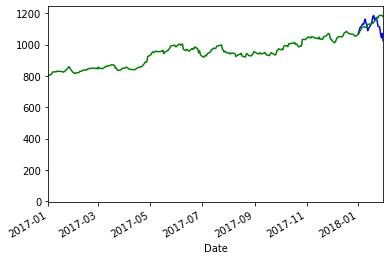

In [56]:
#Predict price from Jan 01, 2018, to Jan 30, 2018
dates = pd.date_range(start="2018-01-01", end ="2018-01-30")
plt.plot(dates, forecast_predicted, color = 'b')
df['Adj. Close'].plot(color ='g')

#Show only this portion of the graph as well as actual results, to see how accurate we really were
plt.xlim(xmin=datetime.date(2017,1,1))
plt.xlim(xmax=datetime.date(2018,1,30))

print("Clearly unpredictable.. but close!!")